# 2021년 경기도 주차장 현황

2021년 기준 경기도에 있는 주차장 데이터를 이용하여, <br>
전체 주차장의 현황과 무료 주차장, 유료 주차장을 파악 합니다. <br>
matplotlib, seaborn, 그리고 R로도 시각화를 해봅니다.

In [11]:
import pandas as pd

In [12]:
df1 = pd.read_csv('C:/Users/SANGHEE/Desktop/git_test01/test_01/GG_park.csv',encoding='UTF-8')

### 컬럼확인

* columns / shape / head 로 데이터프레임의 컬럼을 확인합니다.

In [13]:
df1.columns # 컬럼 확인

Index(['시군별(1)', '시군별(2)', '2019', '2019.1', '2019.2', '2019.3', '2019.4',
       '2019.5', '2019.6', '2019.7', '2019.8', '2019.9', '2019.10', '2019.11',
       '2019.12', '2019.13', '2019.14', '2019.15', '2020', '2020.1', '2020.2',
       '2020.3', '2020.4', '2020.5', '2020.6', '2020.7', '2020.8', '2020.9',
       '2020.10', '2020.11', '2020.12', '2020.13', '2020.14', '2020.15',
       '2021', '2021.1', '2021.2', '2021.3', '2021.4', '2021.5', '2021.6',
       '2021.7', '2021.8', '2021.9', '2021.10', '2021.11', '2021.12',
       '2021.13', '2021.14', '2021.15'],
      dtype='object')

In [14]:
df1.shape # 행,열 수 확인

(37, 50)

In [15]:
df1.head()

,시군별(1),시군별(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15
0,시군별(1),시군별(2),합계,합계,노상,노상,노상,노상,노상,노상,...,노상,노상,노외,노외,노외,노외,노외,노외,부설,부설
1,시군별(1),시군별(2),소계,소계,소계,소계,유료,유료,무료,무료,...,무료,무료,소계,소계,공영,공영,민영,민영,소계,소계
2,시군별(1),시군별(2),주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면),...,주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면)
3,합계,소계,495916,6354036,3231,107724,1560,43792,1671,63932,...,1610,62993,3253,219876,1848,127023,1405,92853,496703,6774911
4,남부,소계,333272,4730342,3002,99527,1478,40662,1524,58865,...,1465,57666,2448,166057,1486,100338,962,65719,332160,5055381


### 전처리 해야 할 부분!
* <p style="font-size:15px">원본 xlsx 파일에서 한 셀로 통합된 2019 행이, csv 형식으로 전환하면서 2019,2019.1,2019.2 등으로 엑셀의<br> 셀 하나하나가 쉼표로 구분되기 때문에 자동으로 2019,2019.1,2019.2... <br>형식으로 컬럼이 지정되어 있음을 확인 할 수 있습니다.  </p>
* <p style="font-size:15px"> 0~2 인덱스를 이에 맞게 수정해야 할 필요가 있으며, '합계', '소계' 로된 데이터는 삭제 합니다. </p>

In [16]:
df1.iloc[1,:]=='소계' # 소계로 되어 있는 컬럼 찾기

시군별(1)     False
시군별(2)     False
2019        True
2019.1      True
2019.2      True
2019.3      True
2019.4     False
2019.5     False
2019.6     False
2019.7     False
2019.8      True
2019.9      True
2019.10    False
2019.11    False
2019.12    False
2019.13    False
2019.14     True
2019.15     True
2020        True
2020.1      True
2020.2      True
2020.3      True
2020.4     False
2020.5     False
2020.6     False
2020.7     False
2020.8      True
2020.9      True
2020.10    False
2020.11    False
2020.12    False
2020.13    False
2020.14     True
2020.15     True
2021        True
2021.1      True
2021.2      True
2021.3      True
2021.4     False
2021.5     False
2021.6     False
2021.7     False
2021.8      True
2021.9      True
2021.10    False
2021.11    False
2021.12    False
2021.13    False
2021.14     True
2021.15     True
Name: 1, dtype: bool

* 소계로 되어 있는 부분을 제거 해 줍니다.

In [17]:
df2 = df1.drop(columns=['2019','2019.1','2019.2','2019.3','2019.8','2019.9','2019.14','2019.15'
                       ,'2020','2020.1','2020.2','2020.3','2020.8','2020.9','2020.14','2020.15'
                       ,'2021','2021.1','2021.2','2021.3','2021.8','2021.9','2021.14','2021.15']) # 소계로 되어 있는 부분 제거

In [18]:
df2

,시군별(1),시군별(2),2019.4,2019.5,2019.6,2019.7,2019.10,2019.11,2019.12,2019.13,...,2020.12,2020.13,2021.4,2021.5,2021.6,2021.7,2021.10,2021.11,2021.12,2021.13
0,시군별(1),시군별(2),노상,노상,노상,노상,노외,노외,노외,노외,...,노외,노외,노상,노상,노상,노상,노외,노외,노외,노외
1,시군별(1),시군별(2),유료,유료,무료,무료,공영,공영,민영,민영,...,민영,민영,유료,유료,무료,무료,공영,공영,민영,민영
2,시군별(1),시군별(2),주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면),...,주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면),주차장수 (개),면수 (면)
3,합계,소계,1560,43792,1671,63932,1690,121826,1257,80700,...,1380,90371,1841,48118,1610,62993,1848,127023,1405,92853
4,남부,소계,1478,40662,1524,58865,1376,97207,853,52300,...,870,56729,1501,43402,1465,57666,1486,100338,962,65719
5,남부,수원시,831,16477,170,3646,68,7832,180,7569,...,186,7951,865,18644,170,3480,79,8954,233,7964
6,남부,성남시,153,4721,207,2814,259,18712,59,6429,...,54,6975,143,4371,183,2472,287,19410,46,6827
7,남부,안양시,26,1831,455,12989,81,6590,22,1361,...,22,1361,25,1681,464,13943,75,5620,22,1361
8,남부,부천시,288,8612,-,-,131,8070,57,2955,...,58,2961,303,8829,6,258,170,9286,60,2991
9,남부,광명시,9,663,2,379,20,943,32,3724,...,31,3722,9,657,2,379,19,948,31,5189


In [19]:
df2.loc[df2['시군별(2)'] == '소계'] # 소계로 되어 있는 부분 확인

,시군별(1),시군별(2),2019.4,2019.5,2019.6,2019.7,2019.10,2019.11,2019.12,2019.13,...,2020.12,2020.13,2021.4,2021.5,2021.6,2021.7,2021.10,2021.11,2021.12,2021.13
3,합계,소계,1560,43792,1671,63932,1690,121826,1257,80700,...,1380,90371,1841,48118,1610,62993,1848,127023,1405,92853
4,남부,소계,1478,40662,1524,58865,1376,97207,853,52300,...,870,56729,1501,43402,1465,57666,1486,100338,962,65719
26,북부,소계,82,3130,147,5067,314,24619,404,28400,...,510,33642,340,4716,145,5327,362,26685,443,27134


In [20]:
df3 = df2.drop(index=[3,4,26]) # 소계로 되어 있는 부분 제거

In [21]:
df3.columns

Index(['시군별(1)', '시군별(2)', '2019.4', '2019.5', '2019.6', '2019.7', '2019.10',
       '2019.11', '2019.12', '2019.13', '2020.4', '2020.5', '2020.6', '2020.7',
       '2020.10', '2020.11', '2020.12', '2020.13', '2021.4', '2021.5',
       '2021.6', '2021.7', '2021.10', '2021.11', '2021.12', '2021.13'],
      dtype='object')

* 면수로 되어 있는 행을 삭제 합니다.

In [22]:
df3.iloc[2,:] == '면수 (면)' # 주차장 면수에 관한 행 찾기

시군별(1)     False
시군별(2)     False
2019.4     False
2019.5      True
2019.6     False
2019.7      True
2019.10    False
2019.11     True
2019.12    False
2019.13     True
2020.4     False
2020.5      True
2020.6     False
2020.7      True
2020.10    False
2020.11     True
2020.12    False
2020.13     True
2021.4     False
2021.5      True
2021.6     False
2021.7      True
2021.10    False
2021.11     True
2021.12    False
2021.13     True
Name: 2, dtype: bool

In [23]:
df4 = df3.drop(columns=['2019.5','2019.7','2019.11','2019.13','2020.5','2020.7','2020.11','2020.13','2021.5','2021.7','2021.11','2021.13']) # 주차장 면수에 관한 컬럼 제거

In [24]:
df4

,시군별(1),시군별(2),2019.4,2019.6,2019.10,2019.12,2020.4,2020.6,2020.10,2020.12,2021.4,2021.6,2021.10,2021.12
0,시군별(1),시군별(2),노상,노상,노외,노외,노상,노상,노외,노외,노상,노상,노외,노외
1,시군별(1),시군별(2),유료,무료,공영,민영,유료,무료,공영,민영,유료,무료,공영,민영
2,시군별(1),시군별(2),주차장수 (개),주차장수 (개),주차장수 (개),주차장수 (개),주차장수 (개),주차장수 (개),주차장수 (개),주차장수 (개),주차장수 (개),주차장수 (개),주차장수 (개),주차장수 (개)
5,남부,수원시,831,170,68,180,812,163,79,186,865,170,79,233
6,남부,성남시,153,207,259,59,145,223,262,54,143,183,287,46
7,남부,안양시,26,455,81,22,26,455,73,22,25,464,75,22
8,남부,부천시,288,-,131,57,295,-,136,58,303,6,170,60
9,남부,광명시,9,2,20,32,9,2,18,31,9,2,19,31
10,남부,평택시,12,59,76,144,12,54,65,146,11,59,68,147
11,남부,안산시,17,198,243,22,17,198,175,23,17,188,233,23


* '주차장 수(개)' 라는 행을 삭제 합니다.

In [25]:
df5 = df4.drop(index=[2]) # 주차장 수 행 제거

In [26]:
df6 = df5.rename(columns={'시군별(1)':'남부_북부','시군별(2)':'시군별','2019.4':'2019_노상(유료)','2019.6':'2019_노상(무료)','2019.10':'2019_노외(공영)','2019.12':'2019_노외(민영)',
                    '2020.4':'2020_노상(유료)','2020.6':'2020_노상(무료)','2020.10':'2020_노외(공영)','2020.12':'2020_노외(민영)',
                    '2021.4':'2021_노상(유료)','2021.6':'2021_노상(무료)','2021.10':'2021_노외(공영)','2021.12':'2021_노외(민영)'}) # 컬럼이름 변경

In [27]:
df6

,남부_북부,시군별,2019_노상(유료),2019_노상(무료),2019_노외(공영),2019_노외(민영),2020_노상(유료),2020_노상(무료),2020_노외(공영),2020_노외(민영),2021_노상(유료),2021_노상(무료),2021_노외(공영),2021_노외(민영)
0,시군별(1),시군별(2),노상,노상,노외,노외,노상,노상,노외,노외,노상,노상,노외,노외
1,시군별(1),시군별(2),유료,무료,공영,민영,유료,무료,공영,민영,유료,무료,공영,민영
5,남부,수원시,831,170,68,180,812,163,79,186,865,170,79,233
6,남부,성남시,153,207,259,59,145,223,262,54,143,183,287,46
7,남부,안양시,26,455,81,22,26,455,73,22,25,464,75,22
8,남부,부천시,288,-,131,57,295,-,136,58,303,6,170,60
9,남부,광명시,9,2,20,32,9,2,18,31,9,2,19,31
10,남부,평택시,12,59,76,144,12,54,65,146,11,59,68,147
11,남부,안산시,17,198,243,22,17,198,175,23,17,188,233,23
12,남부,과천시,20,7,77,-,20,7,77,3,20,9,79,1


###  노상,유료/무료 행 지우고 남부_북부, 시군별 컬럼을 인덱스로 지정

* df7이라는 데이터프레임을 생성하고, csv로 파일을 R로 시각화를 해보기 위해 csv로 내보 냄

In [28]:
df7 = df6.drop(index=[0,1]).set_index(['남부_북부','시군별']) # 노상,유료/무료 행 지우고 남부_북부, 시군별 컬럼을 인덱스로 지정

In [29]:
df7.head()

2019_노상(유료) 2019_노상(무료) 2019_노외(공영) 2019_노외(민영) 2020_노상(유료)  \
남부_북부 시군별                                                               
남부    수원시         831         170          68         180         812   
      성남시         153         207         259          59         145   
      안양시          26         455          81          22          26   
      부천시         288           -         131          57         295   
      광명시           9           2          20          32           9   

          2020_노상(무료) 2020_노외(공영) 2020_노외(민영) 2021_노상(유료) 2021_노상(무료)  \
남부_북부 시군별                                                               
남부    수원시         163          79         186         865         170   
      성남시         223         262          54         143         183   
      안양시         455          73          22          25         464   
      부천시           -         136          58         303           6   
      광명시           2          18          31           9           2   

          2021_노외(공영) 2021_노외(민영)  
남부_북부 시군별                          
남부    수원시          79         233  
      성남시         287          46  
      안양시          75          22  
      부천시         170          60  
      광명시          19          31

In [30]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31 entries, (남부, 수원시) to (북부, 가평군)
Data columns (total 12 columns):
2019_노상(유료)    31 non-null object
2019_노상(무료)    31 non-null object
2019_노외(공영)    31 non-null object
2019_노외(민영)    31 non-null object
2020_노상(유료)    31 non-null object
2020_노상(무료)    31 non-null object
2020_노외(공영)    31 non-null object
2020_노외(민영)    31 non-null object
2021_노상(유료)    31 non-null object
2021_노상(무료)    31 non-null object
2021_노외(공영)    31 non-null object
2021_노외(민영)    31 non-null object
dtypes: object(12)
memory usage: 3.4+ KB


##### 데이터 프레임 형태로 만들었지만, info로 구조를 보면 object 되어 있어 <br> 데이터의 형태를 숫자로 변경해야 합니다.

In [31]:
df7['2019_노상(유료)'] = df7['2019_노상(유료)'].replace('-','0') # '-'으로 되어 있는 데이터를 0으로 치환

##### 결측값으로 되어 있는 '-'가 텍스트 문자이므로 <br> 먼저 텍스트 형식인 '0'으로 치환 합니다.

In [32]:
for column in df7.columns:
    df7[column] = df7[column].replace('-','0')
df7 # 반복문으로 전체 데이터에 '-'으로 되어 있는 데이터를 0으로 치환

2019_노상(유료) 2019_노상(무료) 2019_노외(공영) 2019_노외(민영) 2020_노상(유료)  \
남부_북부 시군별                                                                
남부    수원시          831         170          68         180         812   
      성남시          153         207         259          59         145   
      안양시           26         455          81          22          26   
      부천시          288           0         131          57         295   
      광명시            9           2          20          32           9   
      평택시           12          59          76         144          12   
      안산시           17         198         243          22          17   
      과천시           20           7          77           0          20   
      오산시            2          59          40          39           2   
      시흥시            9          15          79          55           9   
      군포시            4          14          48          12           4   
      의왕시            4          38          22           9           3   
      하남시           13           7           7          22          10   
      용인시            6          36          35          16           7   
      이천시           35          59          14          31          35   
      안성시            5          76          25          26           5   
      김포시            7           5          43          30           9   
      화성시            7          26          40          84          13   
      광주시            0          15          19           8           4   
      여주시           14          47          24           0          14   
      양평군           16          29          25           5          16   
북부    의정부시           0          14          40          63         224   
      동두천시           0          24          21           5           0   
      고양시            6          10          49          79           6   
      구리시            9           3           7           2           9   
      남양주시          12          26          35          76           7   
      파주시           24          55          73         124          24   
      양주시            2           5          28          31           2   
      포천시           10           5          31          24          10   
      연천군           12           5           7           0          12   
      가평군            7           0          23           0          11   

           2020_노상(무료) 2020_노외(공영) 2020_노외(민영) 2021_노상(유료) 2021_노상(무료)  \
남부_북부 시군별                                                                
남부    수원시          163          79         186         865         170   
      성남시          223         262          54         143         183   
      안양시          455          73          22          25         464   
      부천시            0         136          58         303           6   
      광명시            2          18          31           9           2   
      평택시           54          65         146          11          59   
      안산시          198         175          23          17         188   
      과천시            7          77           3          20           9   
      오산시           59          42          39           2          62   
      시흥시           15         104          46           9          17   
      군포시           14          48          15           4          14   
      의왕시           36          21          11           3          29   
      하남시            6          10          52          10           5   
      용인시           36          12           0           6          36   
      이천시           59          14          31          11          19   
      안성시           76          31          27           5          76   
      김포시            4          36          28           9           5   
      화성시           21          46          82          16          23   
      광주시           11          19          11           6          12   
      여주시     

In [33]:
for column in df7.columns:
    df7[column] = pd.to_numeric(df7[column],errors='coerce')
df7 # 반복문으로 전체 데이터를 숫자타입으로 변경

2019_노상(유료)  2019_노상(무료)  2019_노외(공영)  2019_노외(민영)  2020_노상(유료)  \
남부_북부 시군별                                                                     
남부    수원시           831          170           68          180          812   
      성남시           153          207          259           59          145   
      안양시            26          455           81           22           26   
      부천시           288            0          131           57          295   
      광명시             9            2           20           32            9   
      평택시            12           59           76          144           12   
      안산시            17          198          243           22           17   
      과천시            20            7           77            0           20   
      오산시             2           59           40           39            2   
      시흥시             9           15           79           55            9   
      군포시             4           14           48           12            4   
      의왕시             4           38           22            9            3   
      하남시            13            7            7           22           10   
      용인시             6           36           35           16            7   
      이천시            35           59           14           31           35   
      안성시             5           76           25           26            5   
      김포시             7            5           43           30            9   
      화성시             7           26           40           84           13   
      광주시             0           15           19            8            4   
      여주시            14           47           24            0           14   
      양평군            16           29           25            5           16   
북부    의정부시            0           14           40           63          224   
      동두천시            0           24           21            5            0   
      고양시             6           10           49           79            6   
      구리시             9            3            7            2            9   
      남양주시           12           26           35           76            7   
      파주시            24           55           73          124           24   
      양주시             2            5           28           31            2   
      포천시            10            5           31           24           10   
      연천군            12            5            7            0           12   
      가평군             7            0           23            0           11   

            2020_노상(무료)  2020_노외(공영)  2020_노외(민영)  2021_노상(유료)  2021_노상(무료)  \
남부_북부 시군별                                                                     
남부    수원시           163           79          186          865          170   
      성남시           223          262           54          143          183   
      안양시           455           73           22           25          464   
      부천시             0          136           58          303            6   
      광명시             2           18           31            9            2   
      평택시            54           65          146           11           59   
      안산시           198          175           23           17          188   
      과천시             7           77            3           20            9   
      오산시            59           42           39            2           62   
      시흥시            15          104           46            9           17   
      군포시            14           48           15            4           14   
      의왕시            36           21           11            3           29   
      하남시             6           10           52           10            5   
      용인시            36           12            0            6           36   
      이천시            59           14           31           11           19   
      안성시            76           31           27            

In [34]:
df7.info() # 데이터 타입확인

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31 entries, (남부, 수원시) to (북부, 가평군)
Data columns (total 12 columns):
2019_노상(유료)    31 non-null int64
2019_노상(무료)    31 non-null int64
2019_노외(공영)    31 non-null int64
2019_노외(민영)    31 non-null int64
2020_노상(유료)    31 non-null int64
2020_노상(무료)    31 non-null int64
2020_노외(공영)    31 non-null int64
2020_노외(민영)    31 non-null int64
2021_노상(유료)    31 non-null int64
2021_노상(무료)    31 non-null int64
2021_노외(공영)    31 non-null int64
2021_노외(민영)    31 non-null int64
dtypes: int64(12)
memory usage: 3.4+ KB


In [35]:
df7.to_csv('ggpark2.csv',encoding='cp949')

### 컬럼 구분이 완료된, 데이터프레임 df7을 활용
* df7에서 2021년 컬럼만 발췌하여 df8 데이터 프레임 생성 합니다.
* df8에서 유료주차장수, 무료주차장수 컬럼을 새로 만들어 df9 데이터프레임을 생성 합니다.
* groupby로 컬럼의 요약통계량을 구합니다.
* df8에서 노상(무료) + 노외(공영) => 무료주차장수 컬럼을 생성합니다.
* df8에서 노상(유료) + 노외(민영) => 유료주차장수 컬럼을 생성합니다.

In [36]:
df7.describe() # 각 컬럼별 요약 통계량

,2019_노상(유료),2019_노상(무료),2019_노외(공영),2019_노외(민영),2020_노상(유료),2020_노상(무료),2020_노외(공영),2020_노외(민영),2021_노상(유료),2021_노상(무료),2021_노외(공영),2021_노외(민영)
count,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,50.322581,53.903226,54.516129,40.548387,57.16129,55.354839,53.096774,44.516129,59.387097,51.935484,59.612903,45.322581
std,155.269312,92.379779,59.316030,44.350752,155.04926,92.752196,54.318416,56.307413,165.474203,92.112589,63.616915,49.027467
min,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,7.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,5.500000,6.000000,22.500000,8.500000,6.50000,6.000000,20.000000,8.000000,6.500000,6.000000,24.000000,15.500000
50%,9.000000,24.000000,35.000000,26.000000,10.00000,24.000000,36.000000,28.000000,10.000000,19.000000,40.000000,34.000000
75%,16.500000,57.000000,70.500000,58.000000,18.50000,56.500000,68.500000,53.500000,16.500000,50.500000,71.500000,55.500000
max,831.000000,455.000000,259.000000,180.000000,812.00000,455.000000,262.000000,248.000000,865.000000,464.000000,287.000000,233.000000


In [37]:
df7.groupby(level="남부_북부").sum()

,2019_노상(유료),2019_노상(무료),2019_노외(공영),2019_노외(민영),2020_노상(유료),2020_노상(무료),2020_노외(공영),2020_노외(민영),2021_노상(유료),2021_노상(무료),2021_노외(공영),2021_노외(민영)
남부_북부,,,,,,,,,,,,
남부,1478,1524,1376,853,1467,1516,1313,870,1501,1465,1486,962
북부,82,147,314,404,305,200,333,510,340,145,362,443


In [38]:
df7.groupby(level="시군별")[['2021_노상(무료)','2021_노외(공영)']].sum()

,2021_노상(무료),2021_노외(공영)
시군별,,
가평군,0,36
고양시,10,56
과천시,9,79
광명시,2,19
광주시,12,20
구리시,3,9
군포시,14,47
김포시,5,40
남양주시,27,41


In [39]:
df8 = df7.groupby(level="시군별")[['2021_노상(무료)','2021_노외(공영)','2021_노상(유료)','2021_노외(민영)']].sum()

In [40]:
df8['무료주차장수'] = df8['2021_노상(무료)'] + df8['2021_노외(공영)']
df8['유료주차장수'] = df8['2021_노상(유료)'] + df8['2021_노외(민영)']

In [41]:
df9 = df8[['무료주차장수','유료주차장수']]

* 무료주차장수와 유료주차장수 컬럼을 만들어 새로운 데이터프레임 df9 생성

In [42]:
df9

,무료주차장수,유료주차장수
시군별,,
가평군,36,15
고양시,66,88
과천시,88,21
광명시,21,40
광주시,32,20
구리시,12,67
군포시,61,21
김포시,45,37
남양주시,68,59


In [43]:
import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

* 시군별 인덱스를 다시 컬럼으로

In [44]:
df10 = df9.reset_index()

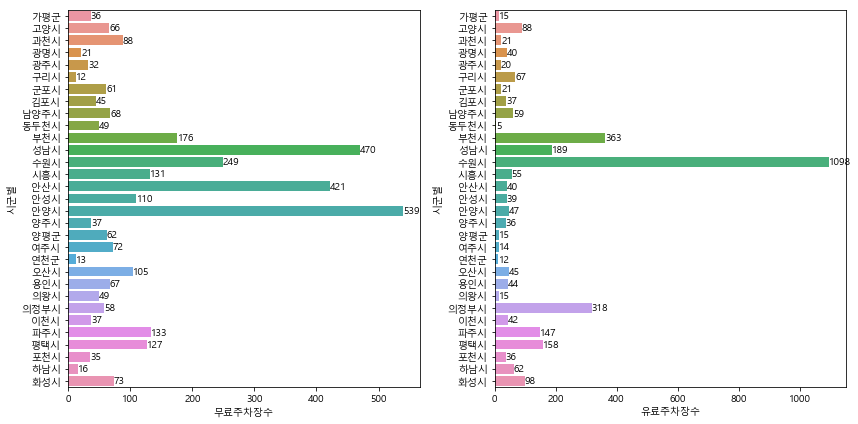

In [45]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.barplot(x='무료주차장수',y='시군별',data=df10,orient='h',ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), va='center')
sns.barplot(x='유료주차장수',y='시군별',data=df10,orient='h',ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), va='center')
plt.tight_layout() # subplot들 간의 간격 조정
plt.show()


* R로 내보냈던 df7 데이터프레임에서, '남부_북부' 컬럼을 인덱스
* df7 데이터 프레임에서 인덱스를 컬럼으로 풀어 남부_북부를 그룹화 할 예정

In [46]:
df11 =df7.reset_index()

In [47]:
df11['무료주차장수'] = df11['2021_노상(무료)'] + df11['2021_노외(공영)']
df11['유료주차장수'] = df11['2021_노상(유료)'] + df11['2021_노외(민영)']


In [48]:
df12 = df11[['남부_북부','시군별','무료주차장수','유료주차장수']]

* 무료주차장과, 유료주차장을 남부_북부로 그룹화하여 테이블 화
* boxplot으로 남부/북부 를 그룹화하여, 유료주차장과 무료주차장의 분포를 시각화

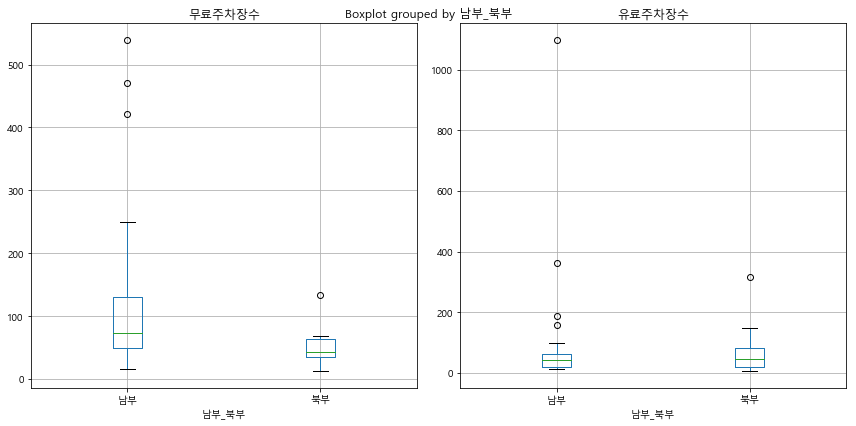

In [49]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
df12.boxplot(column='무료주차장수',by='남부_북부',ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), va='center')
df12.boxplot(column='유료주차장수',by='남부_북부',ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), va='center')
plt.tight_layout() # subplot들 간의 간격 조정
plt.show()

* 경기도 주차장을 남부_북부 그룹화 하여, 요약 통계량!

In [50]:
df12.set_index(['남부_북부','시군별']).groupby(['남부_북부']).sum()

,무료주차장수,유료주차장수
남부_북부,,
남부,2951,2463
북부,507,783
